In [2]:
import os
import numpy as np
import pandas as pd
import pylab as pl
import datetime as dt

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GMM
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
%matplotlib inline

pd.options.display.max_columns = None
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
stations = pd.read_csv('Clean_Data/stations_hour_use_all.csv')

In [4]:
stations.head()

,capacity,lat,lon,name,short_name,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
0,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02,301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0
1,52,40.727408,-73.981420,E 10 St & Avenue A,5659.05,445,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0
2,34,40.733143,-73.975739,E 20 St & FDR Drive,5886.02,487,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0
3,44,40.732219,-73.981656,1 Ave & E 16 St,5779.08,504,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0
4,39,40.767272,-73.993929,W 52 St & 11 Ave,6926.01,72,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0


In [5]:
stations.drop(['lat', 'lon', 'name', 'short_name'], axis=1, inplace=True)

In [6]:
stations.head()

,capacity,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
0,37,301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0
1,52,445,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0
2,34,487,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0
3,44,504,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0
4,39,72,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0


In [7]:
stations_capacity = stations.set_index('station_id')
#stations_capacity.head()
stations_capacity = stations_capacity.astype('float')
stations_capacity.head()

,capacity,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
station_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
301,37.0,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0
445,52.0,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0
487,34.0,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0
504,44.0,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0
72,39.0,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0


In [8]:
stations_nocapacity = stations_capacity.drop(['capacity'], axis=1, inplace=False)
stations_nocapacity = stations_nocapacity.astype('float')
stations_nocapacity.head()

,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
station_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0
445,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0
487,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0
504,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0
72,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0


In [9]:
#stations_capacity
stations_ratio = stations_capacity.apply(lambda x: x/stations_capacity['capacity'], axis=0)
stations_ratio = stations_ratio.drop(['capacity'], axis=1, inplace=False)
stations_ratio.head()

,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
station_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
301,10.540541,18.135135,6.594595,10.189189,4.081081,6.027027,2.594595,3.270270,1.972973,1.594595,10.675676,1.405405,39.513514,4.810811,66.513514,17.027027,94.702703,23.351351,49.216216,20.729730,45.540541,27.297297,50.081081,38.216216,59.162162,51.054054,56.864865,54.918919,55.648649,57.405405,59.783784,66.540541,59.972973,79.324324,62.567568,126.540541,65.405405,128.054054,57.054054,85.378378,39.972973,54.135135,31.864865,41.432432,24.486486,35.594595,16.756757,24.513514
445,7.750000,18.346154,5.173077,10.000000,2.769231,5.750000,1.980769,3.384615,1.730769,2.115385,4.019231,2.057692,23.730769,4.365385,55.538462,11.884615,143.730769,22.519231,60.384615,20.615385,52.826923,29.057692,50.211538,34.673077,54.461538,39.884615,51.480769,46.038462,49.480769,51.365385,55.750000,58.134615,49.230769,65.115385,52.807692,93.884615,54.423077,117.576923,45.269231,87.038462,31.846154,62.461538,21.365385,46.307692,15.519231,36.596154,12.634615,25.615385
487,5.058824,15.705882,3.323529,9.000000,1.500000,6.235294,1.764706,3.852941,5.647059,2.000000,18.205882,1.911765,64.147059,8.911765,107.588235,19.323529,114.705882,23.705882,40.882353,19.529412,31.088235,23.500000,36.588235,32.441176,45.470588,41.558824,42.382353,44.058824,44.176471,54.264706,52.500000,67.882353,52.029412,83.029412,71.794118,136.000000,62.323529,129.441176,51.794118,82.647059,36.529412,71.705882,23.852941,55.205882,15.911765,38.617647,10.470588,29.588235
504,19.704545,20.840909,12.159091,13.272727,7.477273,9.181818,4.795455,5.204545,3.340909,3.840909,9.909091,3.886364,33.795455,18.204545,81.318182,36.522727,111.340909,61.045455,59.454545,37.954545,43.886364,39.750000,52.386364,52.909091,60.000000,57.590909,59.750000,57.113636,60.113636,64.136364,69.159091,68.568182,69.454545,79.886364,90.386364,123.909091,84.522727,140.636364,73.636364,102.636364,53.750000,68.318182,46.977273,53.750000,39.931818,41.318182,32.545455,32.613636
72,3.256410,7.000000,2.000000,3.512821,1.564103,2.384615,0.820513,0.897436,1.743590,0.974359,3.230769,4.871795,11.051282,13.102564,23.230769,25.384615,90.897436,38.564103,57.205128,42.282051,41.487179,30.897436,35.333333,29.102564,35.487179,34.564103,40.641026,37.025641,44.487179,42.948718,47.564103,45.769231,52.153846,48.615385,60.230769,57.717949,59.128205,75.230769,41.179487,51.871795,21.179487,44.564103,15.102564,28.256410,12.384615,22.487179,7.333333,14.102564


In [10]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    #print(KM)
    
#     KM = []
#     for k in K:
#         KM.append(KMeans(n_clusters=k).fit(data))
#         print(k)
    
    #print(KM)
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]


    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]

    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


def silhouette_score_plot(data,range_n_clusters):
    X=data
    silhouette_score_max = 0
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(8, 8)

        #The 1st subplot is the silhouette plot
        #The silhouette coefficient can range from -1, 1 but in this example all
        #lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        #The (n_clusters+1)*10 is for inserting blank space between silhouette
        #plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        
        if silhouette_avg > silhouette_score_max:
            silhouette_score_max = silhouette_avg
            K = n_clusters
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
             # Aggregate the silhouette scores for samples belonging to
             # cluster i, and sort them
            ith_cluster_silhouette_values = \
                 sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_silhouette_values,
                               facecolor=color, edgecolor=color, alpha=0.7)

             # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

             # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

         # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.show()
    
    print("Max silhouette_score:", silhouette_score_max, "when K =", K)
    #return(K)

For stations_capacity --- kmeans

In [14]:
min_max_scaler_1 = MinMaxScaler()
df_scaled_1 = pd.DataFrame(min_max_scaler_1.fit_transform(stations_capacity), columns=stations_capacity.columns, index=stations_capacity.index)

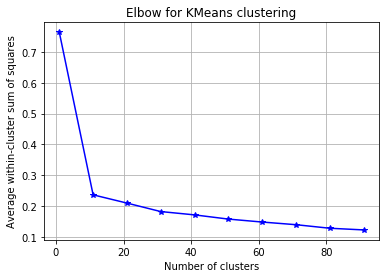

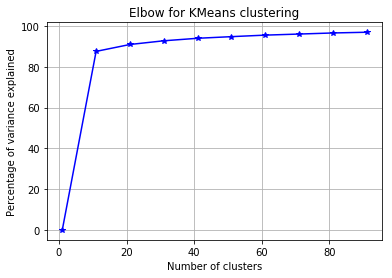

In [15]:
elbow(df_scaled_1, range(1,100,10))

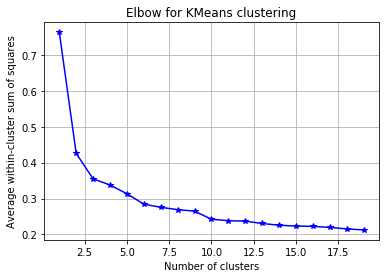

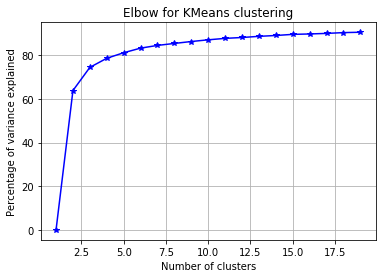

In [16]:
elbow(df_scaled_1, range(1,20))

For n_clusters = 2 The average silhouette_score is : 0.701855973926


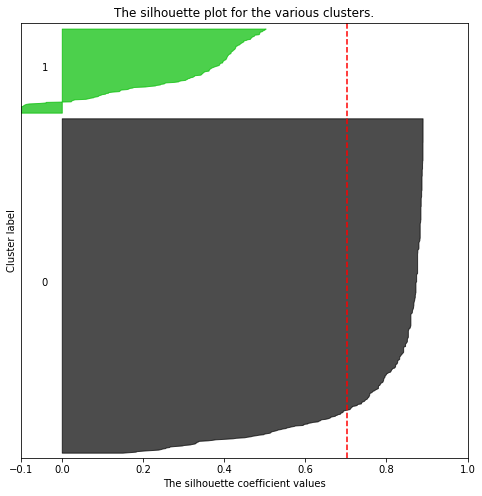

For n_clusters = 3 The average silhouette_score is : 0.632769913378


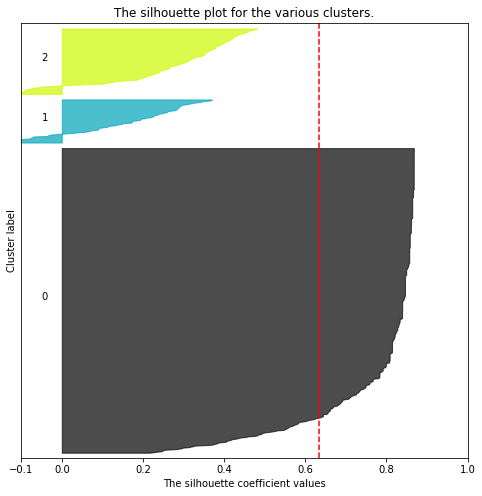

For n_clusters = 4 The average silhouette_score is : 0.632594780092


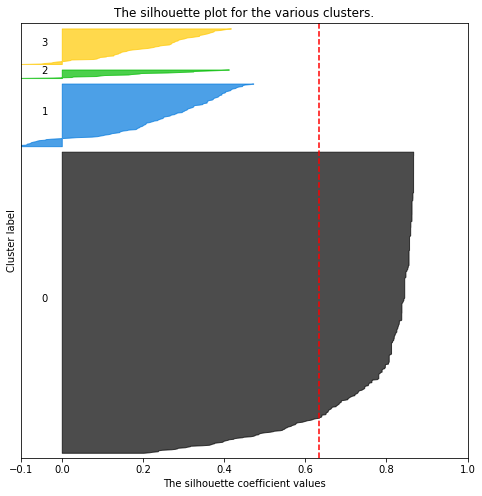

For n_clusters = 5 The average silhouette_score is : 0.537995986742


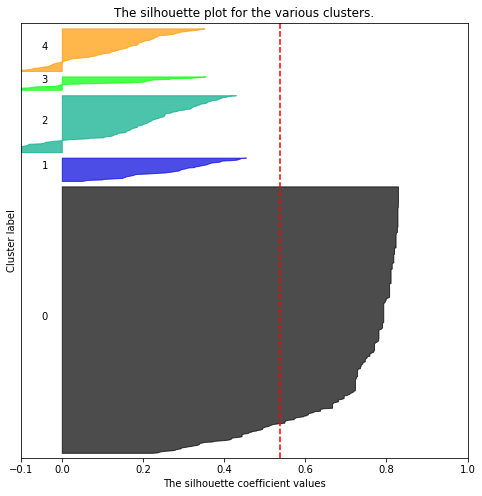

For n_clusters = 6 The average silhouette_score is : 0.505318621603


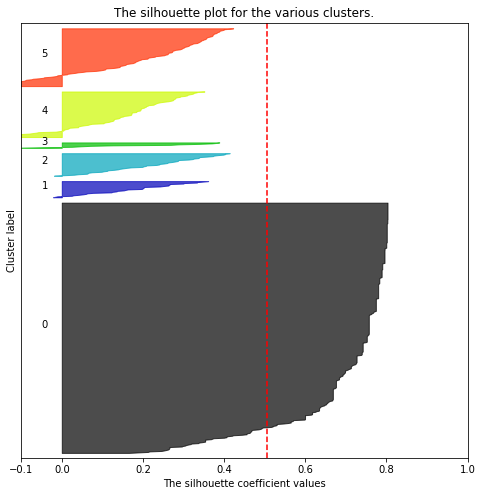

For n_clusters = 7 The average silhouette_score is : 0.501354246753


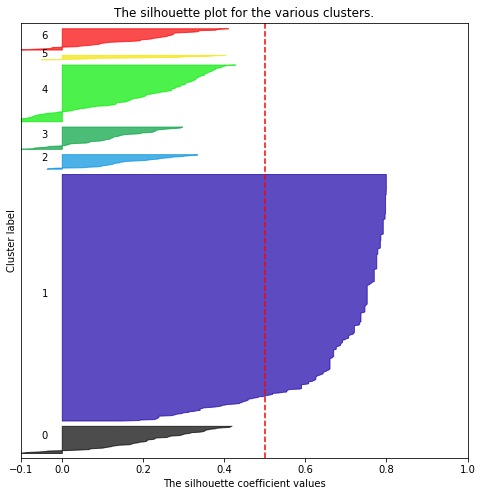

For n_clusters = 8 The average silhouette_score is : 0.485343208929


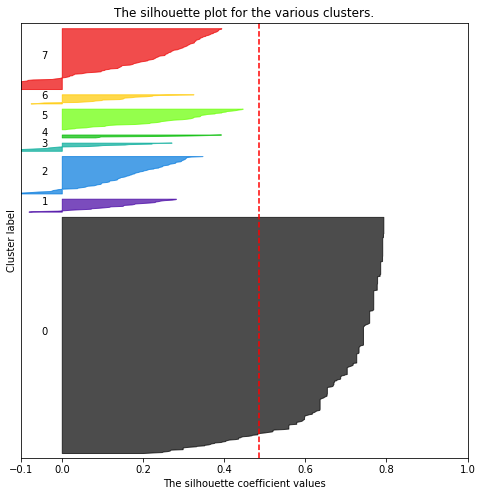

For n_clusters = 9 The average silhouette_score is : 0.469503184936


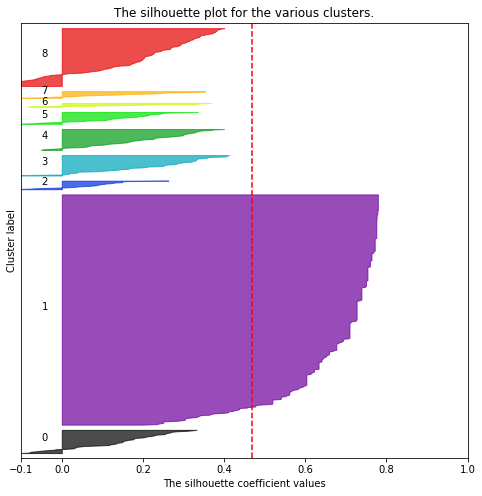

Max silhouette_score: 0.701855973926 when K = 2


In [17]:
K = silhouette_score_plot(df_scaled_1, range(2,10))

In [18]:
min_max_scaler_2 = MinMaxScaler()
df_scaled_2 = pd.DataFrame(min_max_scaler_2.fit_transform(stations_nocapacity), columns=stations_nocapacity.columns, index=stations_nocapacity.index)

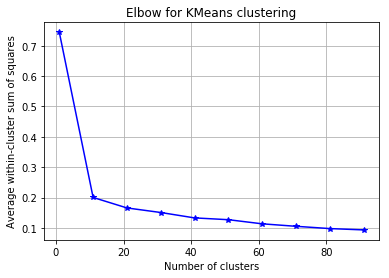

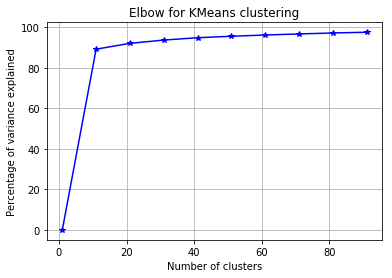

In [19]:
elbow(df_scaled_2, range(1,100,10))

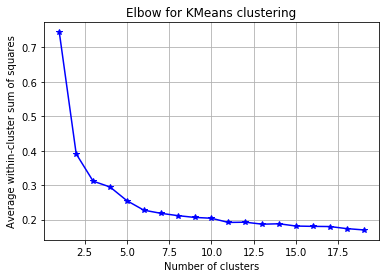

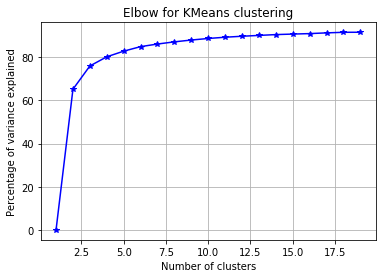

In [20]:
elbow(df_scaled_2, range(1,20))

For n_clusters = 2 The average silhouette_score is : 0.734113031638


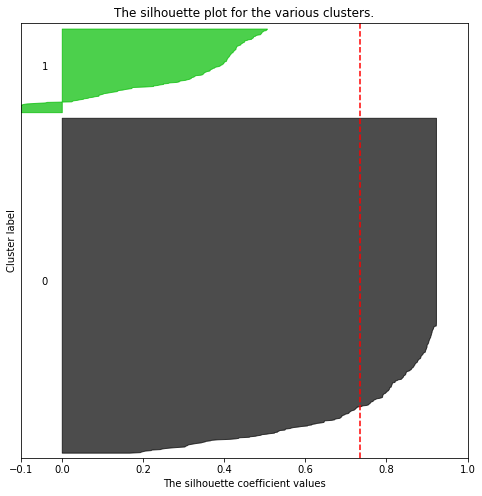

For n_clusters = 3 The average silhouette_score is : 0.68590764252


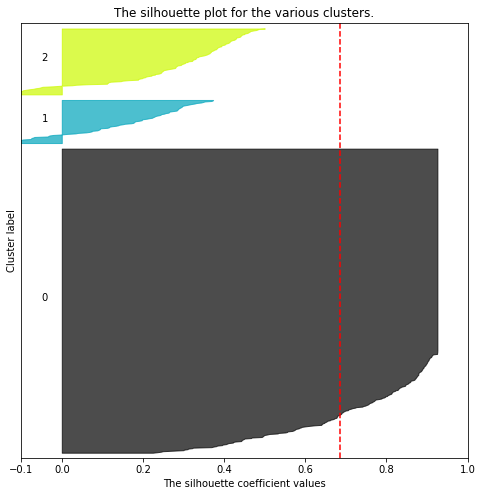

For n_clusters = 4 The average silhouette_score is : 0.686325090043


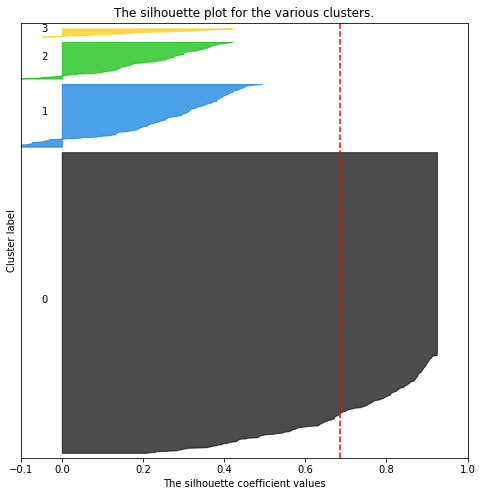

For n_clusters = 5 The average silhouette_score is : 0.661377628959


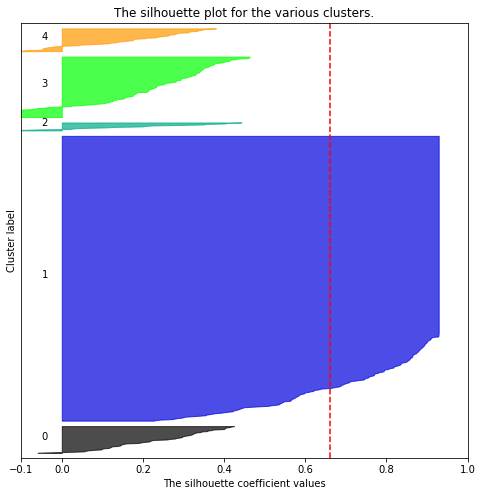

For n_clusters = 6 The average silhouette_score is : 0.625195525533


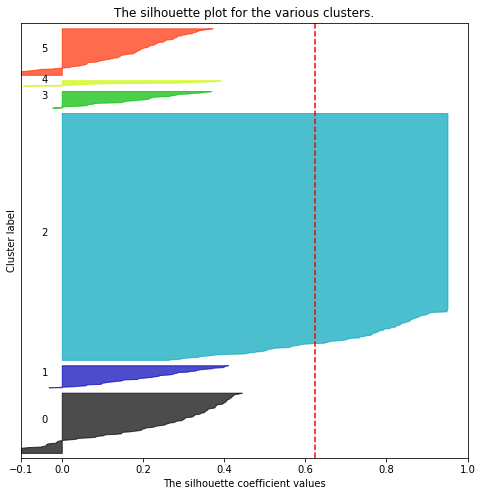

For n_clusters = 7 The average silhouette_score is : 0.624976352031


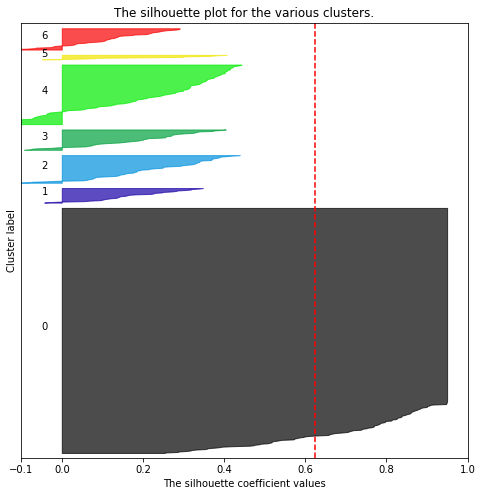

For n_clusters = 8 The average silhouette_score is : 0.624051149848


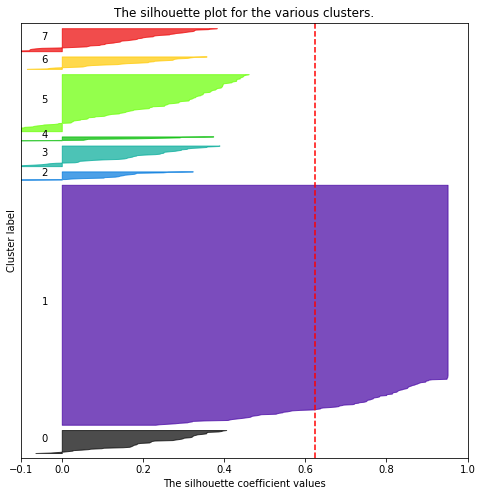

For n_clusters = 9 The average silhouette_score is : 0.621943226237


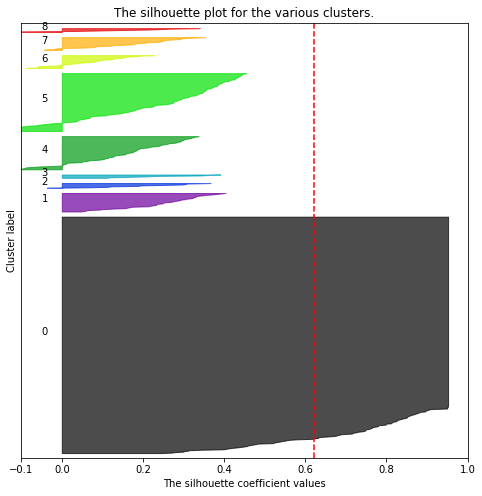

Max silhouette_score: 0.734113031638 when K = 2


In [21]:
K = silhouette_score_plot(df_scaled_2, range(2,10))

In [22]:
stations_ratio = stations_ratio.replace([np.inf, -np.inf], np.nan)

In [23]:
stations_ratio = stations_ratio.dropna()

In [24]:
stations_ratio.shape

(812, 48)

In [25]:
min_max_scaler_3 = MinMaxScaler()
df_scaled_3 = pd.DataFrame(min_max_scaler_3.fit_transform(stations_ratio), columns=stations_ratio.columns, index=stations_ratio.index)

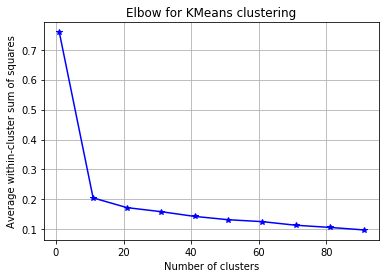

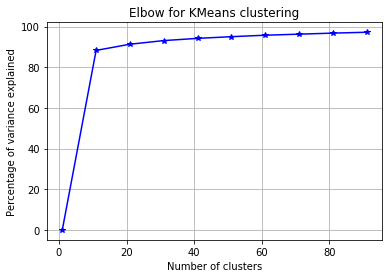

In [26]:
elbow(df_scaled_3, range(1,100,10))

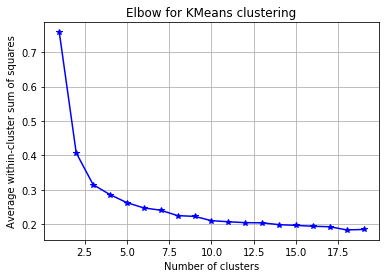

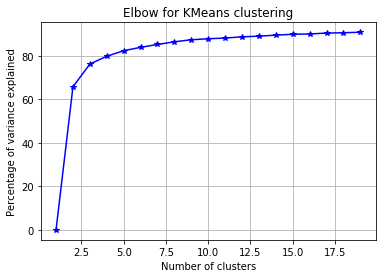

In [29]:
elbow(df_scaled_3, range(1,20))

For n_clusters = 2 The average silhouette_score is : 0.723552814231


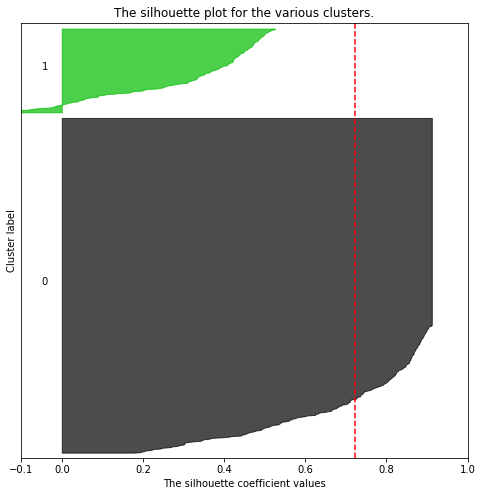

For n_clusters = 3 The average silhouette_score is : 0.664010685765


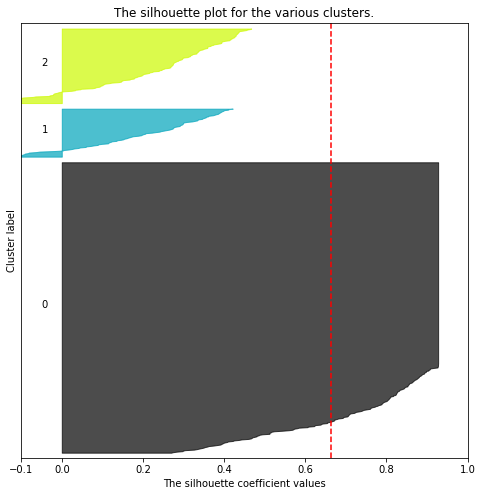

For n_clusters = 4 The average silhouette_score is : 0.635327211419


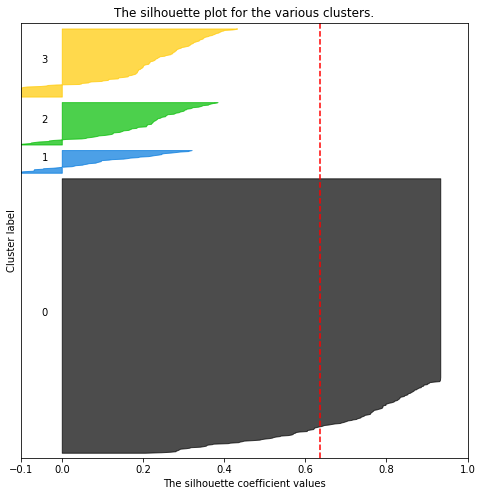

For n_clusters = 5 The average silhouette_score is : 0.623009896898


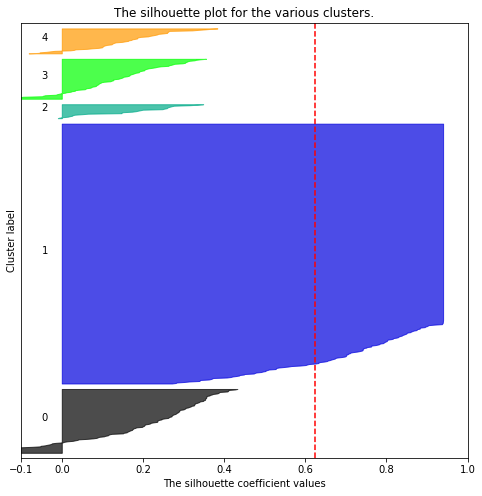

For n_clusters = 6 The average silhouette_score is : 0.62811422197


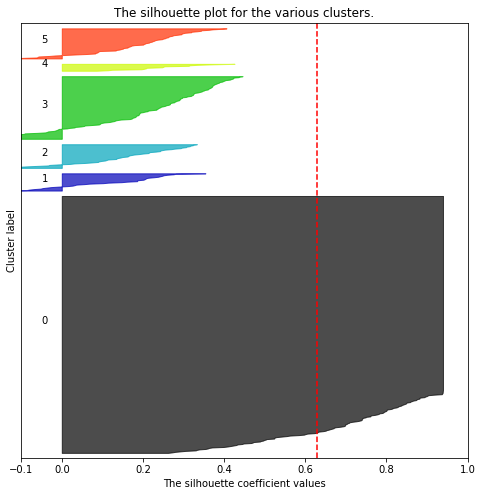

For n_clusters = 7 The average silhouette_score is : 0.615774306178


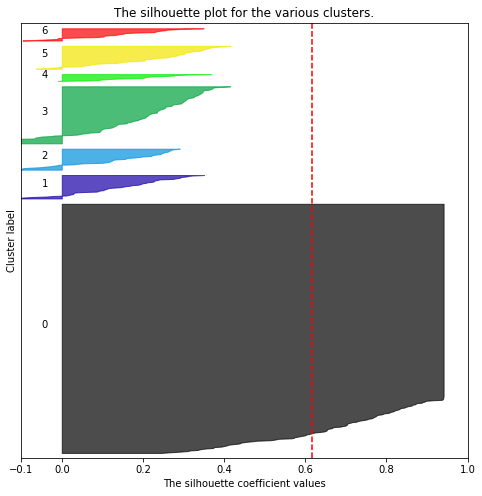

For n_clusters = 8 The average silhouette_score is : 0.611032764465


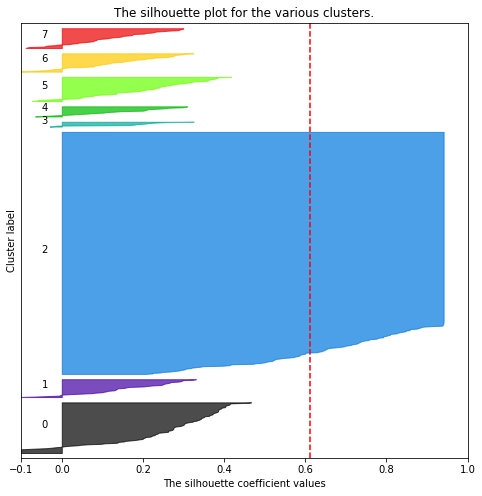

For n_clusters = 9 The average silhouette_score is : 0.612566057067


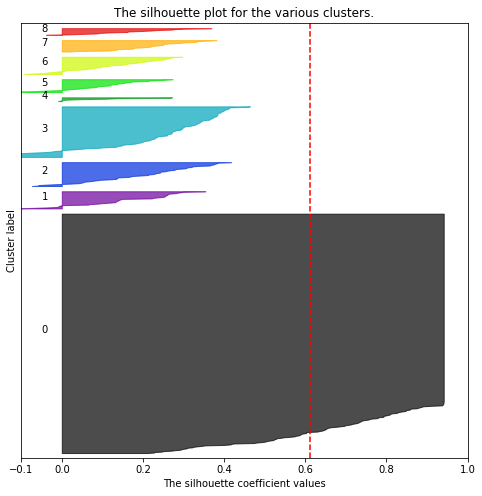

For n_clusters = 10 The average silhouette_score is : 0.596201280887


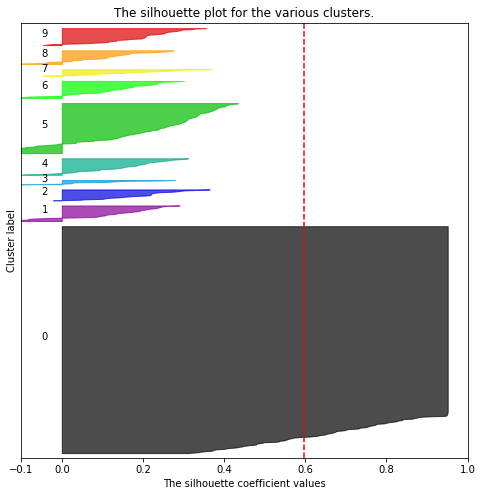

For n_clusters = 11 The average silhouette_score is : 0.593985607767


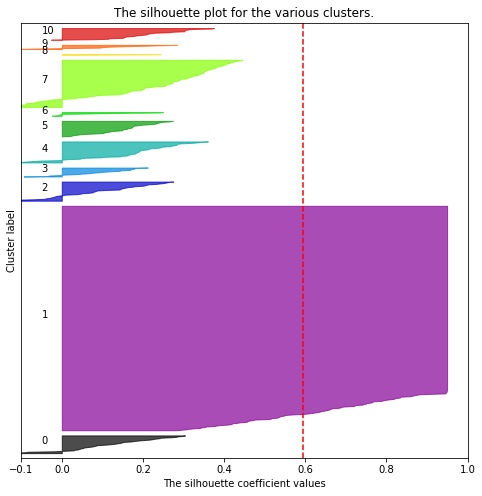

For n_clusters = 12 The average silhouette_score is : 0.595281737732


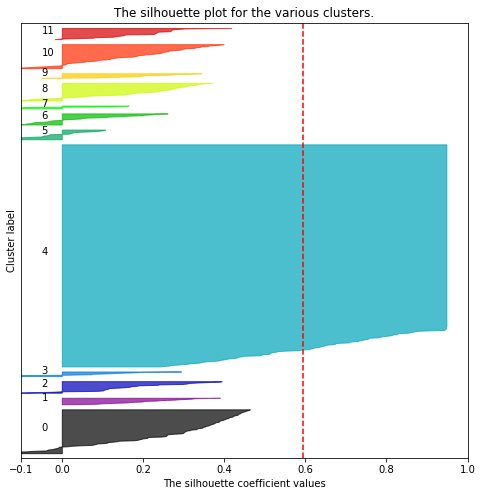

For n_clusters = 13 The average silhouette_score is : 0.597522825793


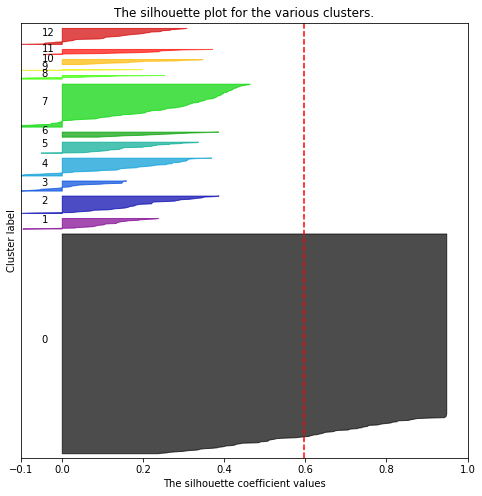

For n_clusters = 14 The average silhouette_score is : 0.598944843271


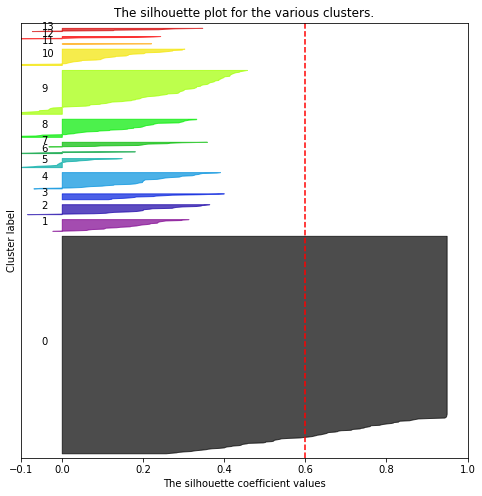

For n_clusters = 15 The average silhouette_score is : 0.586578168485


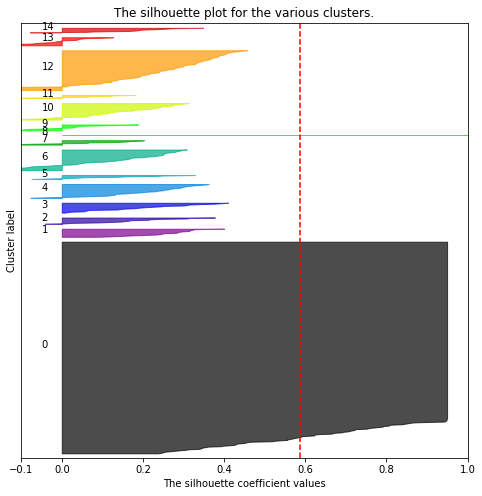

For n_clusters = 16 The average silhouette_score is : 0.597462323641


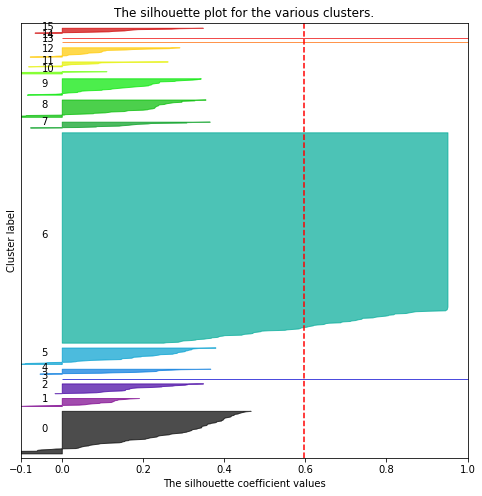

For n_clusters = 17 The average silhouette_score is : 0.583341556516


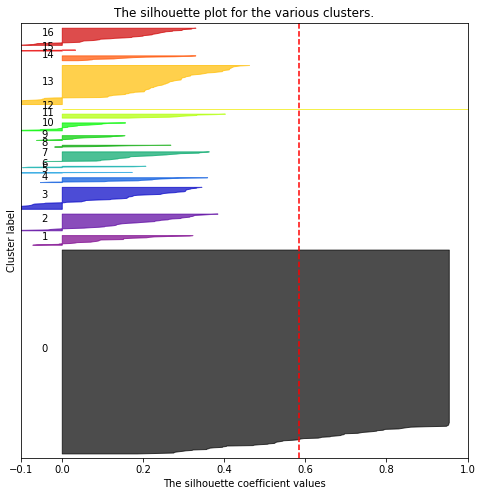

For n_clusters = 18 The average silhouette_score is : 0.596448445527


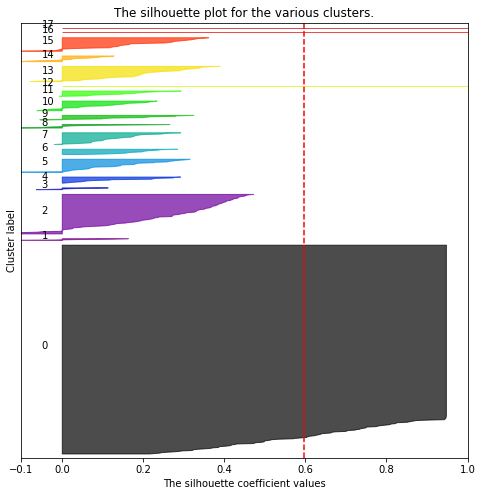

For n_clusters = 19 The average silhouette_score is : 0.5758322101


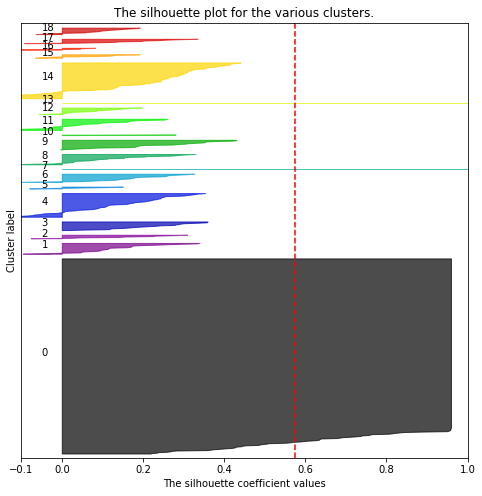

Max silhouette_score: 0.723552814231 when K = 2


In [30]:
K = silhouette_score_plot(df_scaled_3, range(2,20))

Model 3, k=3

## The reason of choose the data set and the K number

Using the elbow method to choose the appropriate K for each data. For dataset 1, the K is 10; For dataset 2, the K is 6; For dataset 3, the K is 5. Then compare the silhouette score of each model, then we choose the highest silhouette score. So we will use dataset 2 and the K is 6.

## Why no capacity?

As we use the each hour usage to clustering the type of CitiBike station, the real different of each type station is if people need CitiBike in this hour. However the capacity is a fix number, which only reflect the builder's thought but not the people need.

In [31]:
min_max_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(stations_nocapacity), columns=stations_nocapacity.columns, index=stations_nocapacity.index)

In [32]:
clusterer = KMeans(n_clusters=6, random_state=324)
cluster_labels = clusterer.fit_predict(df_scaled)

In [33]:
stations_nocapacity.head()

,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
station_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0
445,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0
487,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0
504,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0
72,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0


In [34]:
stations_nocapacity['label'] = cluster_labels

In [36]:
stations_nocapacity.head()

,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label
station_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0,1
445,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0,1
487,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0,1
504,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0,1
72,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0,5


In [37]:
stations_nocapacity = stations_nocapacity.reset_index()

In [38]:
stations_nocapacity.to_csv('Clean_Data/stations_class_all.csv', index=False)

read the shp file

In [39]:
otherdata = pd.read_csv('Clean_Data/citibike_spatial_joined.csv')

In [40]:
otherdata.head(1)

,OBJECTID,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,capacity,lat,lon,name,short_name,station_id,DDLat,DDLon,ORIG_OID,OBJECTID_1,Shape_Leng,zone,LocationID,borough,taxi_R_OBJECTID,taxi_R_tz,taxi_R_total,taxi_R_male,taxi_R_age_under_29,taxi_R_age_30_54,taxi_R_age_55_over,taxi_R_white,taxi_R_black,taxi_R_asian,taxi_R_others,taxi_R_two_or_more,taxi_R_less_high_school,taxi_R_high_school,taxi_R_college,taxi_R_bachelor,taxi_W_OBJECTID,taxi_W_tz,taxi_W_total,taxi_W_male,taxi_W_age_under_29,taxi_W_age_30_54,taxi_W_age_55_over,taxi_W_white,taxi_W_black,taxi_W_asian,taxi_W_others,taxi_W_two_or_more,taxi_W_less_high_school,taxi_W_high_school,taxi_W_college,taxi_W_bachelor,nyu_2451_34513_statefp,nyu_2451_34513_countyfp,nyu_2451_34513_tractce,nyu_2451_34513_geoid,nyu_2451_34513_name,nyu_2451_34513_namelsad,nyu_2451_34513_mtfcc,nyu_2451_34513_funcstat,nyu_2451_34513_aland,nyu_2451_34513_awater,nyu_2451_34513_intptlat,nyu_2451_34513_intptlon,nyu_2451_34513_ct,census_csv_CensusTract,census_csv_County,census_csv_Borough,census_csv_Income,census_csv_IncomePerCap,census_csv_Drive,census_csv_Carpool,census_csv_Transit,census_csv_Walk,census_csv_OtherTransp,census_csv_WorkAtHome,census_csv_MeanCommute,census_csv_Employed,census_csv_PrivateWork,census_csv_PublicWork,census_csv_SelfEmployed,census_csv_FamilyWork,census_csv_Unemployment
0,1,1,1,1,1,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02,301,40.72218270N,073.98368923W,1,79,0.042625,East Village,79,Manhattan,78,79,23766,0.503408,0.335984,0.501262,0.162754,0.792561,0.065472,0.116216,0.005975,0.019776,0.069259,0.120929,0.176513,0.297315,76,79,26074,0.46951,0.2514,0.544182,0.204418,0.612411,0.218225,0.142901,0.008438,0.018026,0.100445,0.157437,0.22509,0.265629,36,61,3002,36061003002,30.02,Census Tract 30.02,G5020,S,78525,0,40.722964,-73.985866,3.606100e+10,3.606100e+10,New York,Manhattan,50625.0,46124.0,4.5,0.3,59.5,22.2,10.3,3.1,29.6,0.687036,82.6,8.0,8.9,0.5,3.9


In [41]:
othershp = gpd.GeoDataFrame.from_file('GIS_files/shp_spatial_joined/citibike_yunhe.shp')

In [42]:
othershp.head()

,OBJECTID,Join_Count,TARGET_FID,Join_Cou_1,TARGET_F_1,capacity,lat,lon,name,short_name,station_id,DDLat,DDLon,ORIG_OID,OBJECTID_1,Shape_Leng,zone,LocationID,borough,taxi_R_OBJ,taxi_R_tz,taxi_R_tot,taxi_R_mal,taxi_R_age,taxi_R_a_1,taxi_R_a_2,taxi_R_whi,taxi_R_bla,taxi_R_asi,taxi_R_oth,taxi_R_two,taxi_R_les,taxi_R_hig,taxi_R_col,taxi_R_bac,taxi_W_OBJ,taxi_W_tz,taxi_W_tot,taxi_W_mal,taxi_W_age,taxi_W_a_1,taxi_W_a_2,taxi_W_whi,taxi_W_bla,taxi_W_asi,taxi_W_oth,taxi_W_two,taxi_W_les,taxi_W_hig,taxi_W_col,taxi_W_bac,nyu_2451_3,nyu_2451_4,nyu_2451_5,nyu_2451_6,nyu_2451_7,nyu_2451_8,nyu_2451_9,nyu_245_10,nyu_245_11,nyu_245_12,nyu_245_13,nyu_245_14,nyu_245_15,census_csv,census_c_1,census_c_2,census_c_3,census_c_4,census_c_5,census_c_6,census_c_7,census_c_8,census_c_9,census__10,census__11,census__12,census__13,census__14,census__15,census__16,census__17,geometry
0,1,1,1,1,1,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02,301,40.72218270N,073.98368923W,1,79,0.042625,East Village,79,Manhattan,78,79,23766,0.503408,0.335984,0.501262,0.162754,0.792561,0.065472,0.116216,0.005975,0.019776,0.069259,0.120929,0.176513,0.297315,76,79,26074,0.469510,0.251400,0.544182,0.204418,0.612411,0.218225,0.142901,0.008438,0.018026,0.100445,0.157437,0.225090,0.265629,36,061,003002,36061003002,30.02,Census Tract 30.02,G5020,S,78525,0,+40.7229641,-073.9858662,3.606100e+10,3.606100e+10,New York,Manhattan,50625,46124,4.5,0.3,59.5,22.2,10.3,3.1,29.6,0.687036,82.6,8.0,8.9,0.5,3.9,POINT (-73.98368923199996 40.72218269900003)
1,2,1,2,1,2,52,40.727408,-73.981420,E 10 St & Avenue A,5659.05,445,40.72741620N,073.98142150W,2,79,0.042625,East Village,79,Manhattan,78,79,23766,0.503408,0.335984,0.501262,0.162754,0.792561,0.065472,0.116216,0.005975,0.019776,0.069259,0.120929,0.176513,0.297315,76,79,26074,0.469510,0.251400,0.544182,0.204418,0.612411,0.218225,0.142901,0.008438,0.018026,0.100445,0.157437,0.225090,0.265629,36,061,003200,36061003200,32,Census Tract 32,G5020,S,217682,0,+40.7255579,-073.9837166,3.606100e+10,3.606100e+10,New York,Manhattan,71033,58068,1.0,0.0,59.7,20.4,12.2,6.7,30.8,0.631432,83.2,6.0,10.8,0.0,4.4,POINT (-73.98142150199999 40.72741620000005)
2,3,1,3,1,3,34,40.733143,-73.975739,E 20 St & FDR Drive,5886.02,487,40.73315085N,073.97574025W,3,224,0.044020,Stuy Town/Peter Cooper Village,224,Manhattan,222,224,10453,0.471922,0.310246,0.479193,0.210562,0.800057,0.059600,0.114417,0.003731,0.022195,0.054912,0.111164,0.176217,0.347460,218,224,1407,0.611940,0.199716,0.538735,0.261549,0.668088,0.209666,0.095238,0.009950,0.017058,0.169865,0.178394,0.233120,0.218905,36,061,004400,36061004400,44,Census Tract 44,G5020,S,410435,464126,+40.7280964,-073.9714520,3.606100e+10,3.606100e+10,New York,Manhattan,93010,57640,3.7,3.8,58.1,20.3,4.8,9.2,29.7,0.626420,77.7,13.4,8.9,0.0,2.6,POINT (-73.97574024999994 40.73315085100006)
3,4,1,4,1,4,44,40.732219,-73.981656,1 Ave & E 16 St,5779.08,504,40.73222679N,073.98165701W,4,224,0.044020,Stuy Town/Peter Cooper Village,224,Manhattan,222,224,10453,0.471922,0.310246,0.479193,0.210562,0.800057,0.059600,0.114417,0.003731,0.022195,0.054912,0.111164,0.176217,0.347460,218,224,1407,0.611940,0.199716,0.538735,0.261549,0.668088,0.209666,0.095238,0.009950,0.017058,0.169865,0.178394,0.233120,0.218905,36,061,004400,36061004400,44,Census Tract 44,G5020,S,410435,464126,+40.7280964,-073.9714520,3.606100e+10,3.606100e+10,New York,Manhattan,93010,57640,3.7,3.8,58.1,20.3,4.8,9.2,29.7,0.626420,77.7,13.4,8.9,0.0,2.6,POINT (-73.98165701199997 40.73222679100007)
4,5,1,5,1,5,39,40.767272,-73.993929,W 52 St & 11 Ave,6926.01,72,40.76728043N,073.99393033W,5,50,0.055748,Clinton West,50,Manhattan,49,50,8282,0.556991,0.251509,0.597923,0.150567,0.713354,0.116276,0.144047,0.007969,0.018353,0.077035,0.131490,0.197175,0.342792,48,50,25889,0.614392,0.225115,0.608173,0.166712,0.681679,0.195179,0.100042,0.007185,0.015914,0.078952,0.141064,0.203059,0.351810,36,061,013500,36061013500,135,Census Tract 135,G5020,S,420500,411667,+40.7702629,-073.9959718,3.606101e+10,3.606101e

In [43]:
othershp.shape

(768, 83)

In [44]:
othershp_raw = othershp

In [45]:
othershp = othershp.merge(stations_nocapacity, how='left', left_on='station_id', right_on = 'station_id')

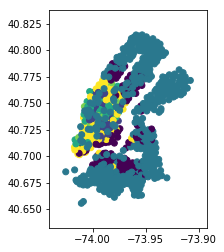

In [46]:
othershp.plot('label')

1. 分析label分类后的结果，与census（work/reside, female/male, old/yound)的分布关系。画出gis图片从而直观感受 / 空间 correlation

2. 空载率 --- real time

3. 各个类别的feature --- 从早到晚的使用情况（mean --- start and end）/ 空载率（各个时间段）/ tripduration 

4. 在各个类别内的特定时间，分别建立线性模型，分析对该类别站点影响最大的数据

5. 


6. The different type of city bike station and the problem they suffer?

7. So different type --- affect / feature / promble 

8. some special type (night / around)